
# Principal Component Analysis

---

![MathUrl](https://c.tenor.com/ZcWPZGLvilUAAAAd/and-thats-a-lot-of-math-math.gif "math")


---
## “Last time I asked: 'What does mathematics mean to you?', and some people answered: "The manipulation of numbers, the manipulation of structures.' And if I had asked what music means to you, would you have answered: 'The manipulation of notes?”

### Serge Lang
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 2.38], 
             [2, 2.49], 
             [3, 5.89], 
             [4, 8.25], 
             [5, 11.83],
             [6, 11.40], 
             [7, 12.68], 
             [8, 17.82], 
             [9, 15.03], 
             [10, 20.42]
            ])

### Demean the data

In [3]:
X[:,0] = X[:,0] - X[:,0].mean()
X[:,1] = X[:,1] - X[:,1].mean()

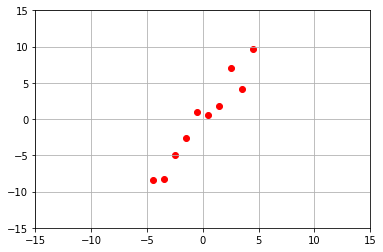

In [4]:
plt.scatter(X[:,0], X[:,1], c = 'r');
plt.xlim([-15, 15]);
plt.ylim([-15, 15]);
plt.grid();

### Calculate the covariance matrix of x1 and x2

In [5]:
C = np.cov(X[:,0], X[:,1]).round(decimals = 2)
C

array([[ 9.17, 17.92],
       [17.92, 37.25]])

### Show the Explained Variance of every feature (x) in percentage from total variance

In [6]:
x1_var = C[0][0]
x2_var = C[1][1]
total_var = x1_var + x2_var 

In [15]:
# print your solution
k=x1_var/total_var
k2=x2_var/total_var

<BarContainer object of 2 artists>

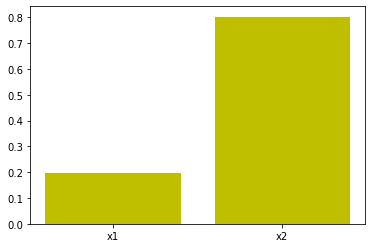

In [16]:
# show the barchart of Explained Variance percentages


plt.bar(x= ["x1", "x2"], height = [k, k2], color= "y")

### Calculate the eigenvectors and eigenvalues of covariance matrix
HINT: use the numpy.linalg.eig() function

[Best explanation](https://www.youtube.com/watch?v=PFDu9oVAE-g)

In [23]:
EigenValues, V = np.linalg.eig(C)

In [24]:
V

array([[-0.89909248, -0.43775874],
       [ 0.43775874, -0.89909248]])

### Sort the Eigenvalues from max to min

In [25]:
ord = np.argsort(EigenValues[::-1])

### Sort the Eigenvector columns like the Eigenvalues (same order)

In [26]:
V = V[:, ord]

### To find the new Principal Components multiply the matrix of X to Eigenvectors

In [27]:
X_new = np.matmul(X, V)

In [28]:
X_new

array([[  9.55735576,   0.35167012],
       [  9.02069685,  -0.49926889],
       [  5.52602368,   0.09001835],
       [  2.96640669,   0.22403651],
       [ -0.69010312,   0.89212033],
       [ -0.7412521 ,  -0.19520841],
       [ -2.32984921,  -0.5339697 ],
       [ -7.38894329,   0.81701776],
       [ -5.31823402,  -1.30342161],
       [-10.60210122,   0.15700554]])

### Calculate the covariance matrix of obtained Principal Components

In [29]:
r=np.cov(X_new[:,0], X_new[:,1]).round(decimals = 2)

### Calculate the Explained Variance of every PC in percentage

In [30]:
# print your solution
x1_var = r[0][0]
x2_var = r[1][1]
total_var = x1_var + x2_var 

In [31]:
k=x1_var/total_var
k2=x2_var/total_var

<BarContainer object of 2 artists>

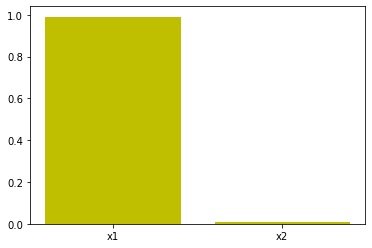

In [32]:
# show the barchart of Explained Variance percentages
plt.bar(x= ["x1", "x2"], height = [k, k2], color= "y")

### Plot the scatter plot of PCs

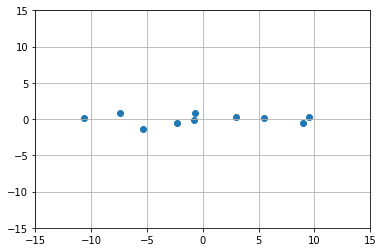

In [85]:
plt.scatter(X_new[:,0], X_new[:,1]);
plt.xlim([-15, 15]);
plt.ylim([-15, 15]);
plt.grid();

### Try to use sklearn PCA algorithm and compare the results.

In [25]:
from sklearn.decomposition import PCA

In [26]:
X_pred = PCA().fit_transform(X)

In [30]:
np.cov(X_pred[:,0], X_pred[:,1]).round(decimals = 2)

array([[45.98,  0.  ],
       [ 0.  ,  0.44]])

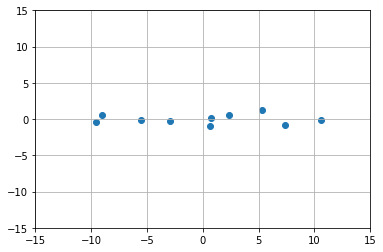

In [91]:
plt.scatter(X_pred[:,0], X_pred[:,1]);
plt.xlim([-15, 15]);
plt.ylim([-15, 15]);
plt.grid();

---
# Practice

In [55]:
import pandas as pd
from sklearn import preprocessing

In [56]:
df = pd.read_csv('wine-clustering.csv')
df.shape

(178, 13)

In [59]:
scaled_data = df.copy().to_numpy()

In [60]:
scaled_data.shape

(178, 13)

## Based on this data try to use your own PCA calculations to reduce the dimension. Choose the number of Components based on Variance Explanation Percentage.

### Compare the results with sklearn PCA algorithm...

In [61]:
scaled_data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [62]:
for i in range(13):
    scaled_data[:,i]=scaled_data[:,i] - scaled_data[:,i].mean()

In [69]:
c2= np.cov(np.transpose(scaled_data)).round(decimals=2)

In [70]:
p=np.diag(c2)

In [71]:
tot_var = sum(p)

In [72]:
percentages = [i/tot_var for i in p]
name = [f'x{i}' for i in range(1, 14)]

<BarContainer object of 13 artists>

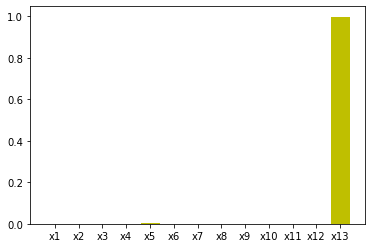

In [73]:
plt.bar(x = name, height = percentages, color = 'y')

### [VIDEO EXPLANATION OF EIGENVECTORS AND EIGENVALUES](https://www.youtube.com/watch?v=PFDu9oVAE-g)